In [1]:
import os
import sys
sys.path.append("/cluster/u/rrastogi/ECNN/utils")
from evaluation_utils import *

import lightgbm as lgb
import shap

TRAIN_PATH = "/cluster/u/rrastogi/ECNN/results/d_original/xcap/featurize_0520/train.features"
XCAP_CLF_PATH = "/cluster/u/rrastogi/ECNN/results/d_original/xcap/featurize_0520/clf.mdl"

In [2]:
clf = lgb.Booster(model_file=XCAP_CLF_PATH)
clf.params["objective"] = "binary"

In [4]:
features, X, Y = get_xcap_data(TRAIN_PATH)

In [5]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


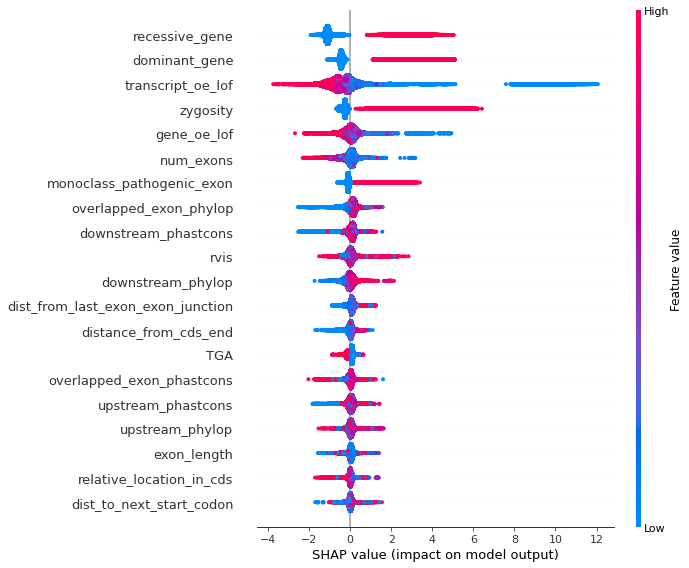

In [6]:
shap.summary_plot(shap_values[1], X, plot_type="dot", feature_names=features)

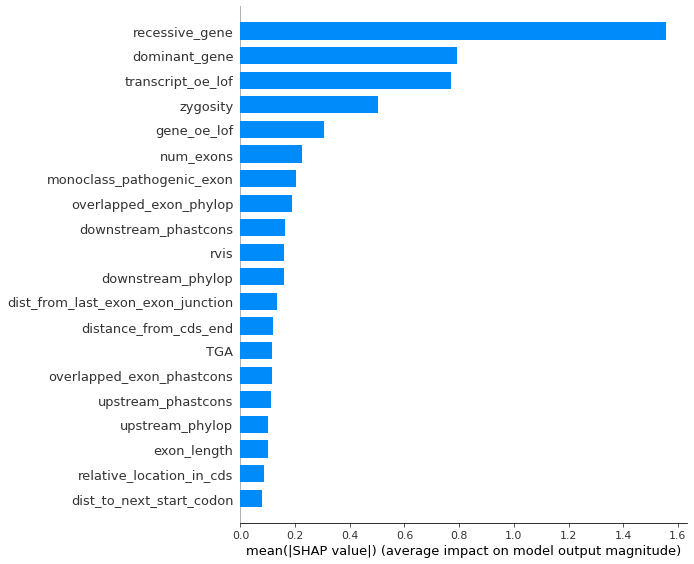

In [7]:
shap.summary_plot(shap_values[1], X, plot_type="bar", feature_names=features)